# Dataset
[Tweets Dataset](https://www.kaggle.com/datasets/bhavikjikadara/tweets-dataset/data) 
Dataset contains (almost) 1,6mln tweets. The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment.


# Fields
- **target**: the polarity of the tweet (0 = negative and 4 = positive)
- **ids**: The ID of the tweet (2087)
- **date**: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- **flag**: The query (`lyx`). If there is no query, then this value is NO_QUERY.
- **user**: the user that tweeted.
- **text**: the text of the tweet.


# EDA
## Importing the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [235]:
df = pd.read_csv("./data/tweets.csv", encoding='latin')
df['Date'] = pd.to_datetime(df['Date'], format='%a %b %d %H:%M:%S PDT %Y')
df = df[df['Date'] < pd.Timestamp('2009-05-28')]
df.head()

,Target,ID,Date,flag,User,Text
0,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


## Description

In [236]:
# According to kaggle description the dataset should contain 1,6mln tweets
df.shape

(388400, 6)

In [237]:
df.isna().sum()

Target    0
ID        0
Date      0
flag      0
User      0
Text      0
dtype: int64

### What is flag?

In [238]:
df['flag'].value_counts()

flag
NO_QUERY    388400
Name: count, dtype: int64

<Axes: >

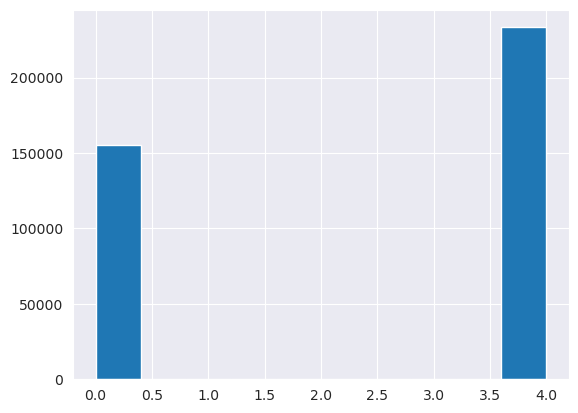

In [239]:
df['Target'].hist()

In [240]:
df[df['Target'] == 0]["Text"].head()

0    is upset that he can't update his Facebook by ...
1    @Kenichan I dived many times for the ball. Man...
2      my whole body feels itchy and like its on fire 
3    @nationwideclass no, it's not behaving at all....
4                        @Kwesidei not the whole crew 
Name: Text, dtype: object

In [241]:
df[df['Target'] == 4]["Text"].head()

799999         I LOVE @Health4UandPets u guys r the best!! 
800000    im meeting up with one of my besties tonight! ...
800001    @DaRealSunisaKim Thanks for the Twitter add, S...
800002    Being sick can be really cheap when it hurts t...
800003      @LovesBrooklyn2 he has that effect on everyone 
Name: Text, dtype: object

It looks like having just the word **not** in the tweet is enough for the author to determine the sentiment of the tweet.

## Transformations and drops

In [242]:
try:
    df.drop(['ID', 'flag'], axis=1, inplace=True)
except KeyError:
    pass
df['Weekday'] = df['Date'].dt.weekday
df['Time'] = df['Date'].dt.time
df['Full_date'] = df['Date'].dt.date

df['Target'] = df['Target'].map({0: 0, 4: 1})
df.head()

,Target,Date,User,Text,Weekday,Time,Full_date
0,0,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,0,22:19:49,2009-04-06
1,0,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,0,22:19:53,2009-04-06
2,0,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,0,22:19:57,2009-04-06
3,0,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all....",0,22:19:57,2009-04-06
4,0,2009-04-06 22:20:00,joy_wolf,@Kwesidei not the whole crew,0,22:20:00,2009-04-06


In [243]:
print("Date range:", df['Date'].min(), df['Date'].max())

Date range: 2009-04-06 22:19:49 2009-05-27 07:27:38


<Axes: xlabel='Full_date'>

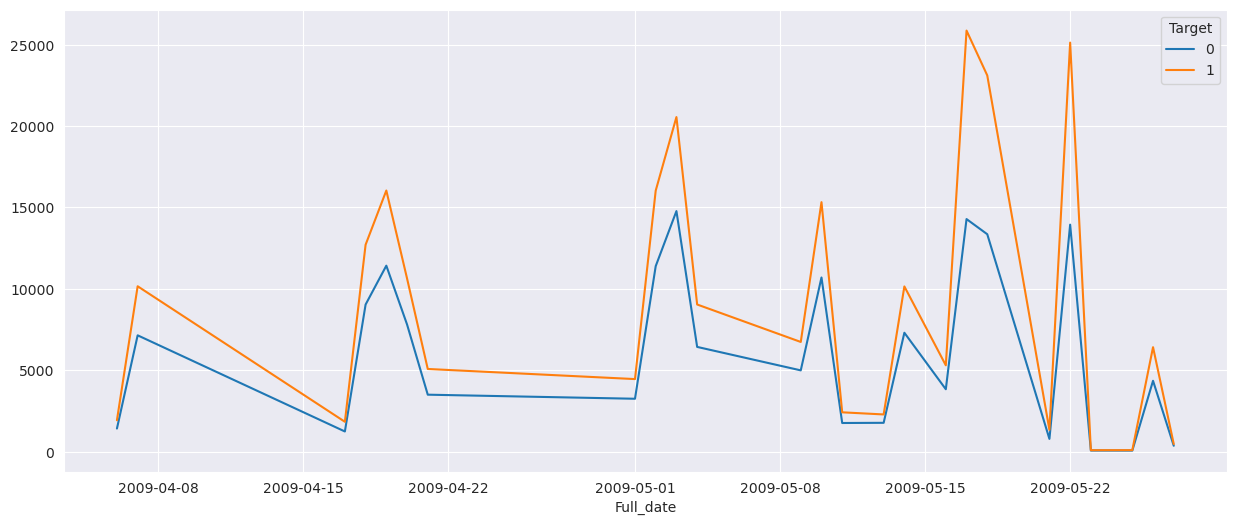

In [261]:
sentiment_over_time = df.groupby(['Full_date', 'Target']).size().unstack(fill_value=0)
sentiment_over_time.plot(kind='line', figsize=(15, 6))

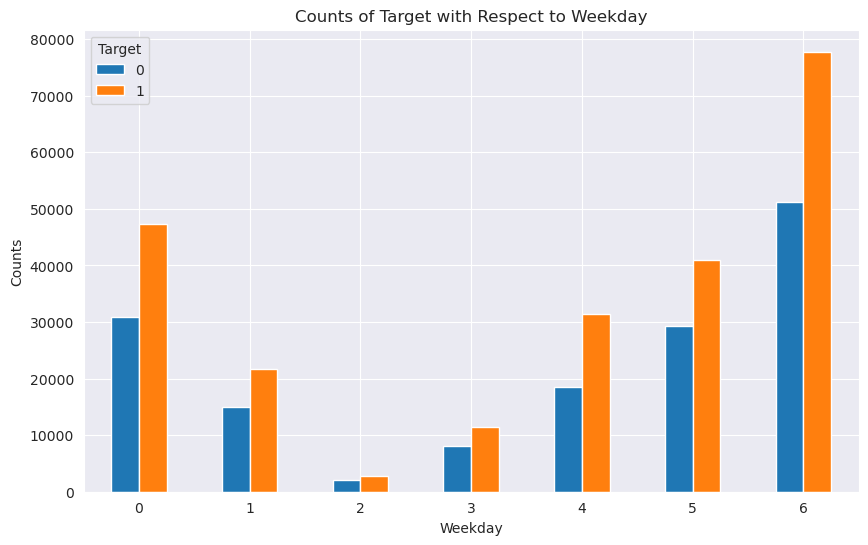

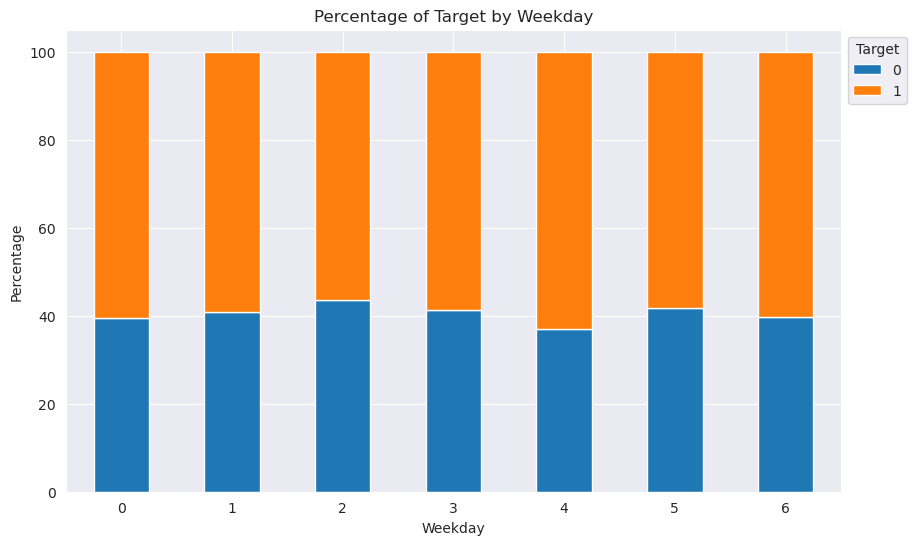

In [244]:
counts = df.groupby(['Weekday', 'Target']).size().unstack(fill_value=0)
counts.plot(kind='bar', figsize=(10, 6))
plt.title('Counts of Target with Respect to Weekday')
plt.xlabel('Weekday')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.legend(title='Target')
plt.show()

percentages = counts.div(counts.sum(axis=1), axis=0) * 100
percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of Target by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Target', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

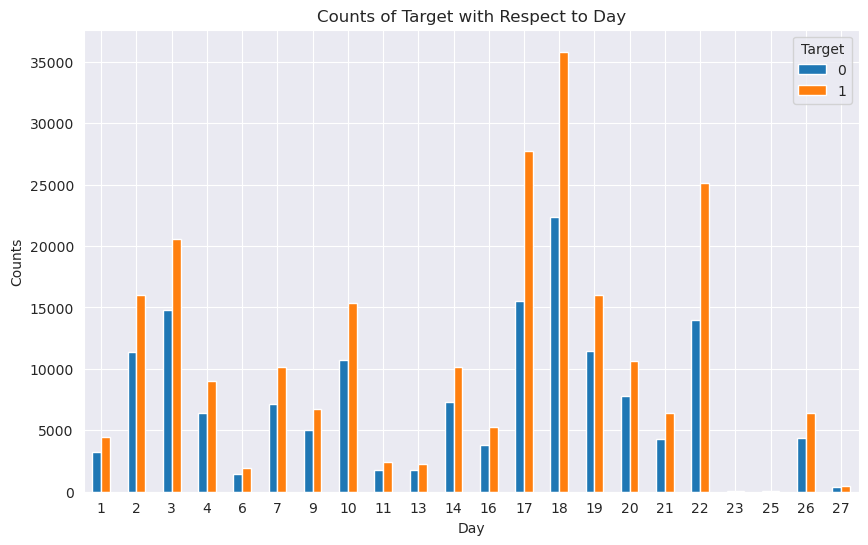

In [245]:
df["Day"] = df["Date"].dt.day
counts = df.groupby(['Day', 'Target']).size().unstack(fill_value=0)
counts.plot(kind='bar', figsize=(10, 6))
plt.title('Counts of Target with Respect to Day')
plt.xlabel('Day')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.legend(title='Target')
plt.show()

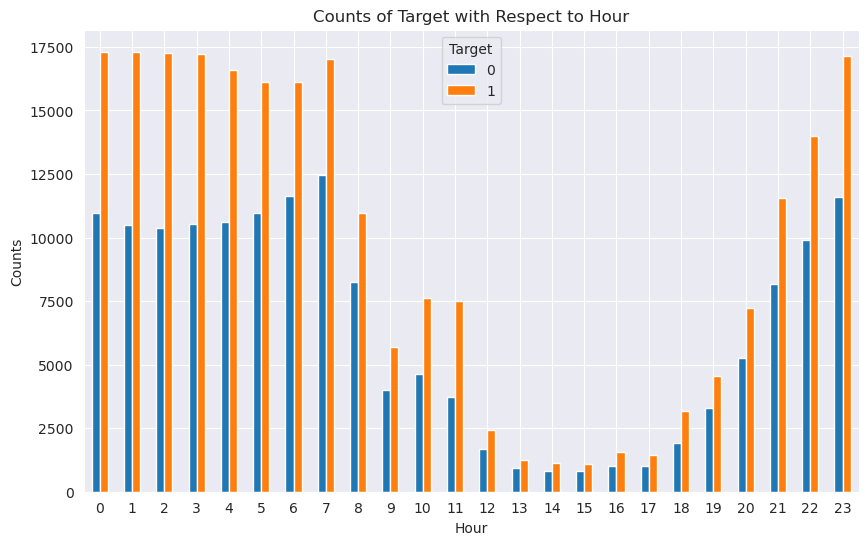

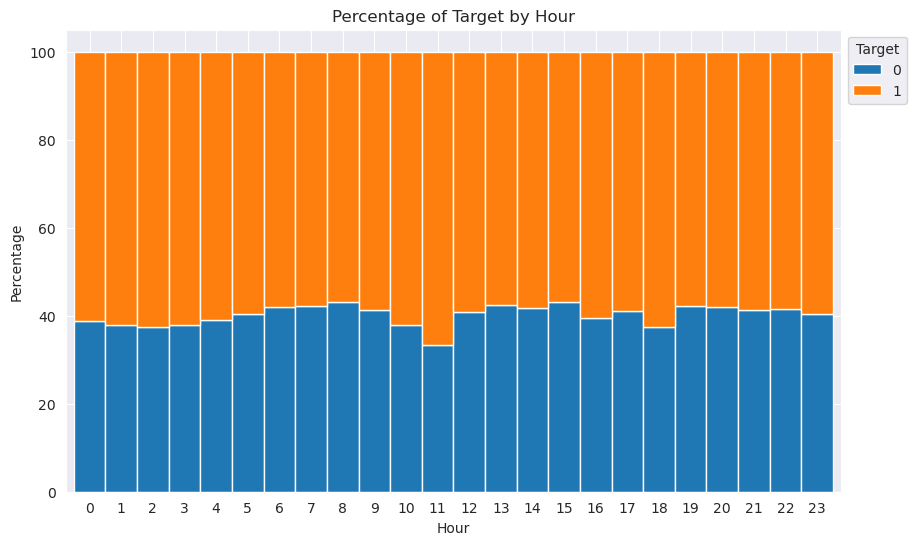

In [271]:

df['Hour'] = df['Date'].dt.hour
counts = df.groupby(['Hour', 'Target']).size().unstack(fill_value=0)
counts.plot(kind='bar', figsize=(10, 6))
plt.title('Counts of Target with Respect to Hour')
plt.xlabel('Hour')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.legend(title='Target')
plt.show()

percentages = counts.div(counts.sum(axis=1), axis=0) * 100
percentages.plot(kind='bar', stacked=True, figsize=(10, 6), width=1)
plt.title('Percentage of Target by Hour')
plt.xlabel('Hour')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Target', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

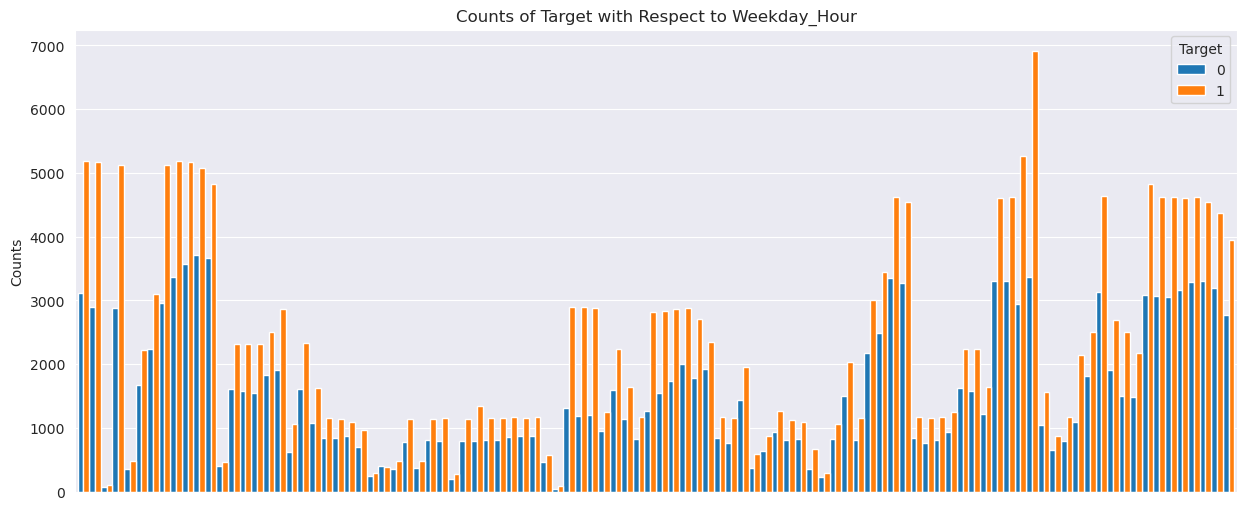

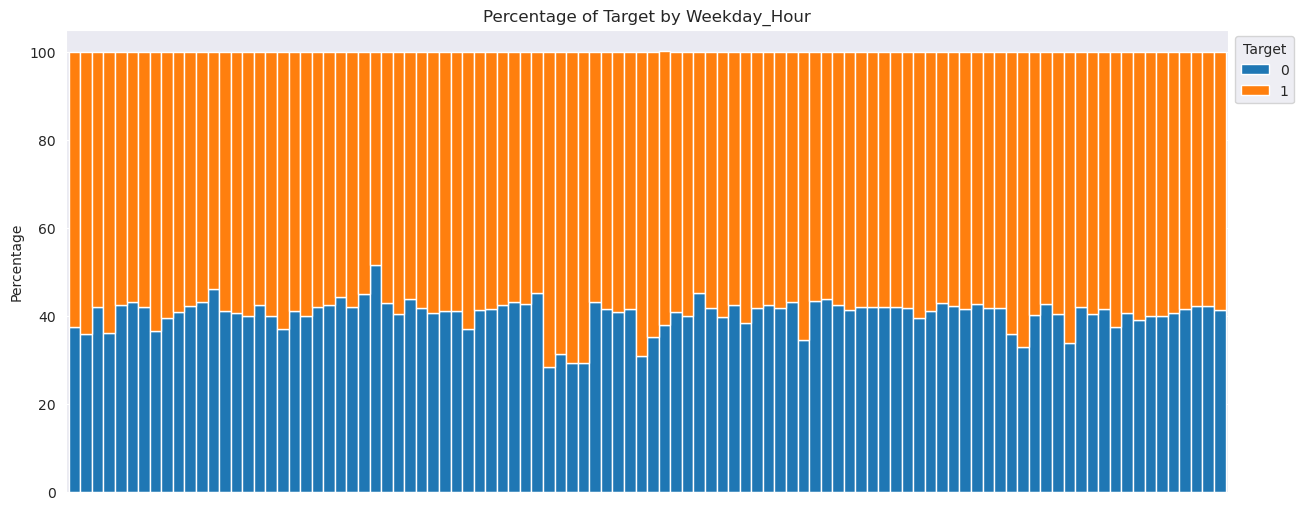

In [270]:
df['Weekday_Hour'] = df['Weekday'].astype(str) + '_' + df['Hour'].astype(str)
counts = df.groupby(['Weekday_Hour', 'Target']).size().unstack(fill_value=0)
counts.plot(kind='bar', figsize=(15, 6), width=1)
plt.title('Counts of Target with Respect to Weekday_Hour')
plt.xlabel('Weekday_Hour')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.legend(title='Target')
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

percentages = counts.div(counts.sum(axis=1), axis=0) * 100
percentages.plot(kind='bar', stacked=True, figsize=(15, 6), width=1)
plt.title('Percentage of Target by Weekday_Hour')
plt.xlabel('Weekday_Hour')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.gca().axes.get_xaxis().set_visible(False)
plt.legend(title='Target', bbox_to_anchor=(1, 1), loc='upper left')

,count,mean,std,min,25%,50%,75%,max
Length,388400.0,74.217392,36.401646,6.0,44.0,69.0,104.0,186.0


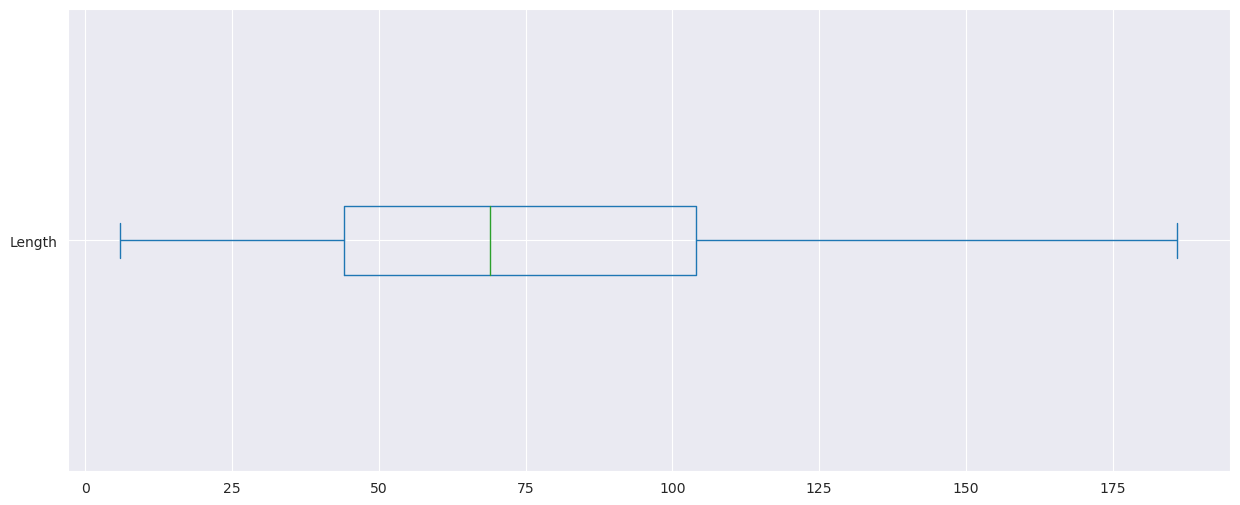

In [246]:
df['Length'] = df['Text'].apply(len)
df['Length'].plot(kind='box', figsize=(15, 6), vert=False)
plt.plot()

df['Length'].describe().to_frame().T

<Axes: ylabel='Frequency'>

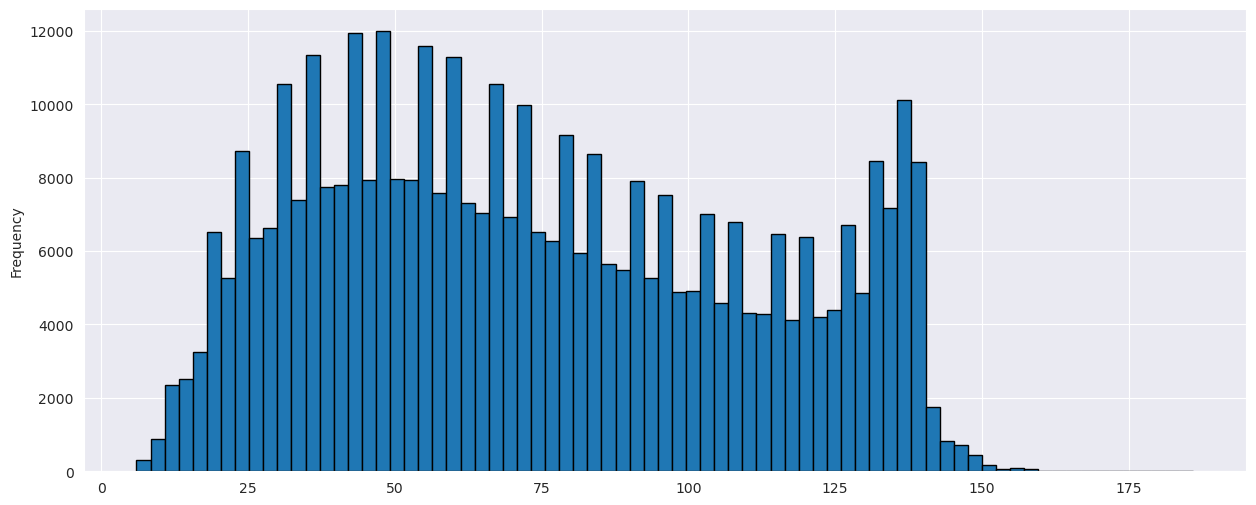

In [247]:
df['Length'].plot(kind='hist', bins=75, figsize=(15, 6), edgecolor='k')

Number of users: 231669


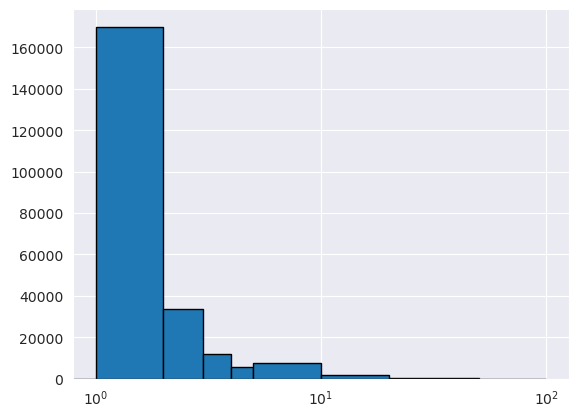

In [248]:
users = df['User'].value_counts()
print("Number of users:", len(users))
tweet_counts = users.value_counts()
bins = [0, 1, 2, 3, 4, 5, 10, 20, 50, 100]
plt.hist(users, bins=bins, edgecolor='k')
plt.xscale('log')
plt.show()

<Axes: xlabel='count'>

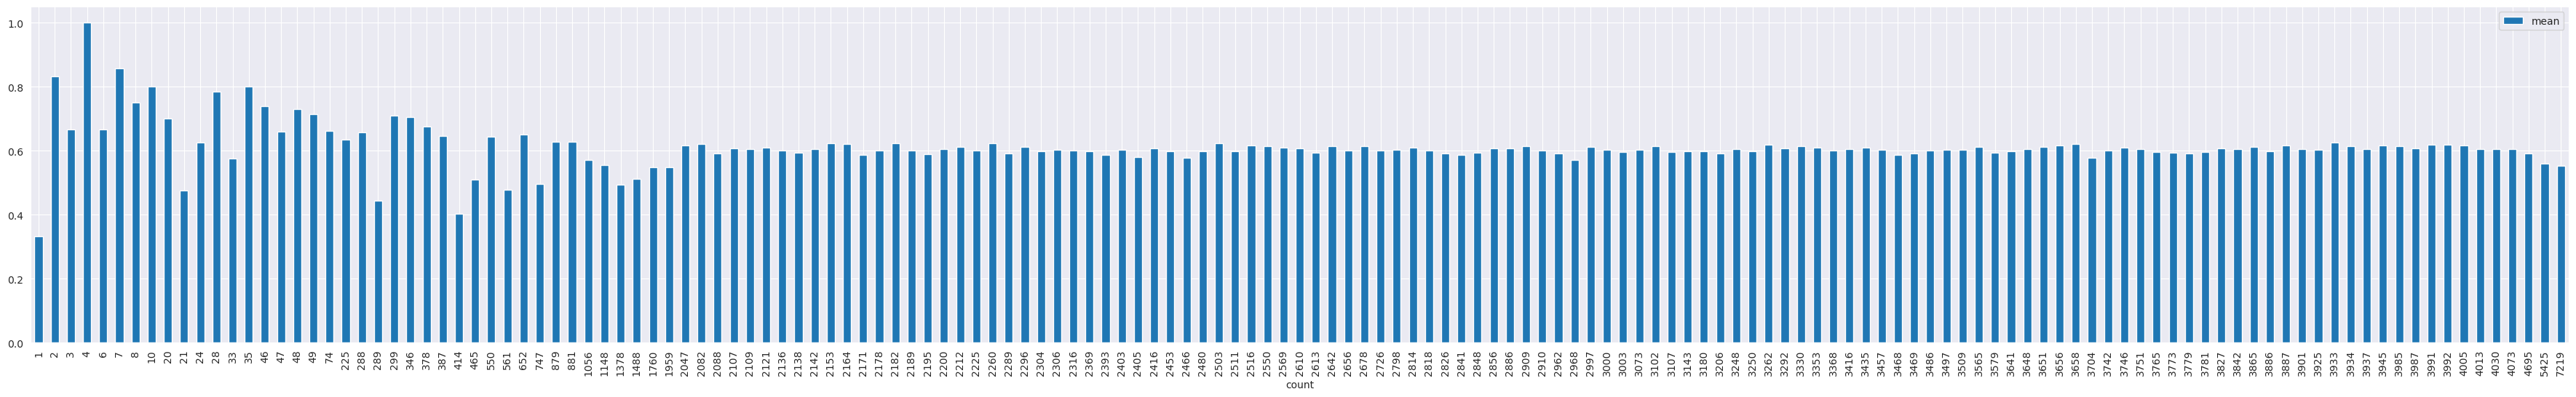

In [249]:
tweets_negative_ratio_length_df = df.copy()
tweets_negative_ratio_length_df.drop(['Date', 'Weekday', 'Time', 'Full_date', 'Text', 'User', 'Day'], axis=1, inplace=True)
tweets_negative_ratio_length_df = tweets_negative_ratio_length_df.groupby('Length').agg(['mean', 'count']).reset_index()
tweets_negative_ratio_length_df.columns = ['Length', 'mean', 'count']
tweets_negative_ratio_length_df = tweets_negative_ratio_length_df.groupby('count').mean().reset_index()
tweets_negative_ratio_length_df.plot(x='count', y='mean', kind='bar', figsize=(45, 6))

In [250]:
from wordcloud import WordCloud
from nltk.corpus import stopwords


words_positive = df[df['Target'] == 1]['Text'].str.split().explode().reset_index(drop=True)
words_negative = df[df['Target'] == 0]['Text'].str.split().explode().reset_index(drop=True)

In [251]:
def plotWordcloud(words):
    filtered_words = words[~words.isin(stopwords.words('english'))]
    print("Number of words:", len(words))
    print("Number of filtered words:", len(filtered_words))
    fig, ax = plt.subplots(1, 2, figsize=(25, 10))

    wc_without_stopwords = WordCloud(background_color='white', colormap='viridis', width=800, height=500).generate(' '.join(filtered_words[0:100]))
    ax[0].imshow(wc_without_stopwords, interpolation='nearest')
    ax[0].set_title('Without stopwords')
    ax[0].axis('off')

    wc_with_stopwords = WordCloud(background_color='white', colormap='viridis', width=800, height=500).generate(' '.join(words[0:100]))
    ax[1].imshow(wc_with_stopwords, interpolation='nearest')
    ax[1].set_title('With stopwords')
    ax[1].axis('off')

    plt.show()

Number of words: 2993521
Number of filtered words: 2022896


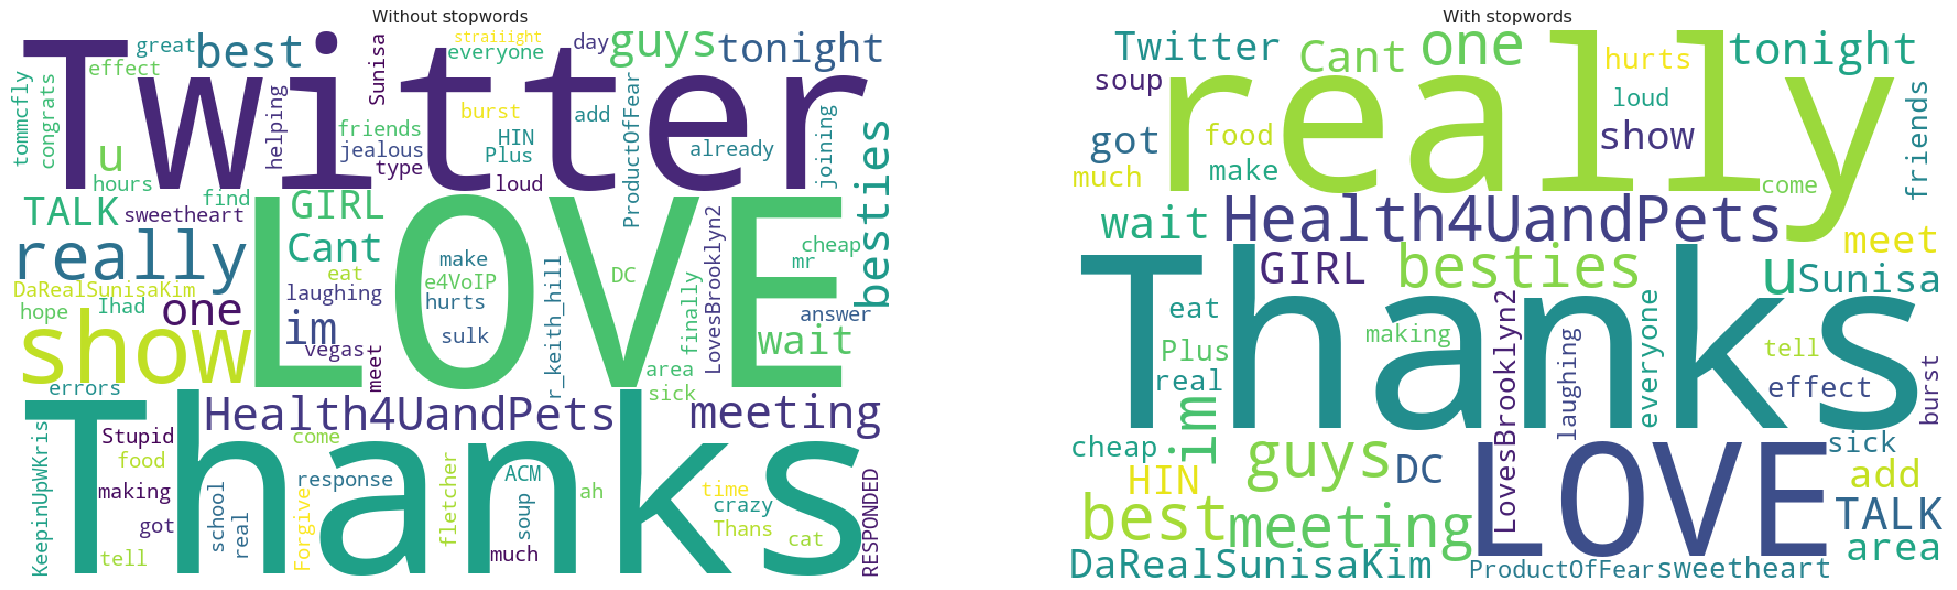

In [252]:
plotWordcloud(words_positive)

Number of words: 2102176
Number of filtered words: 1373802


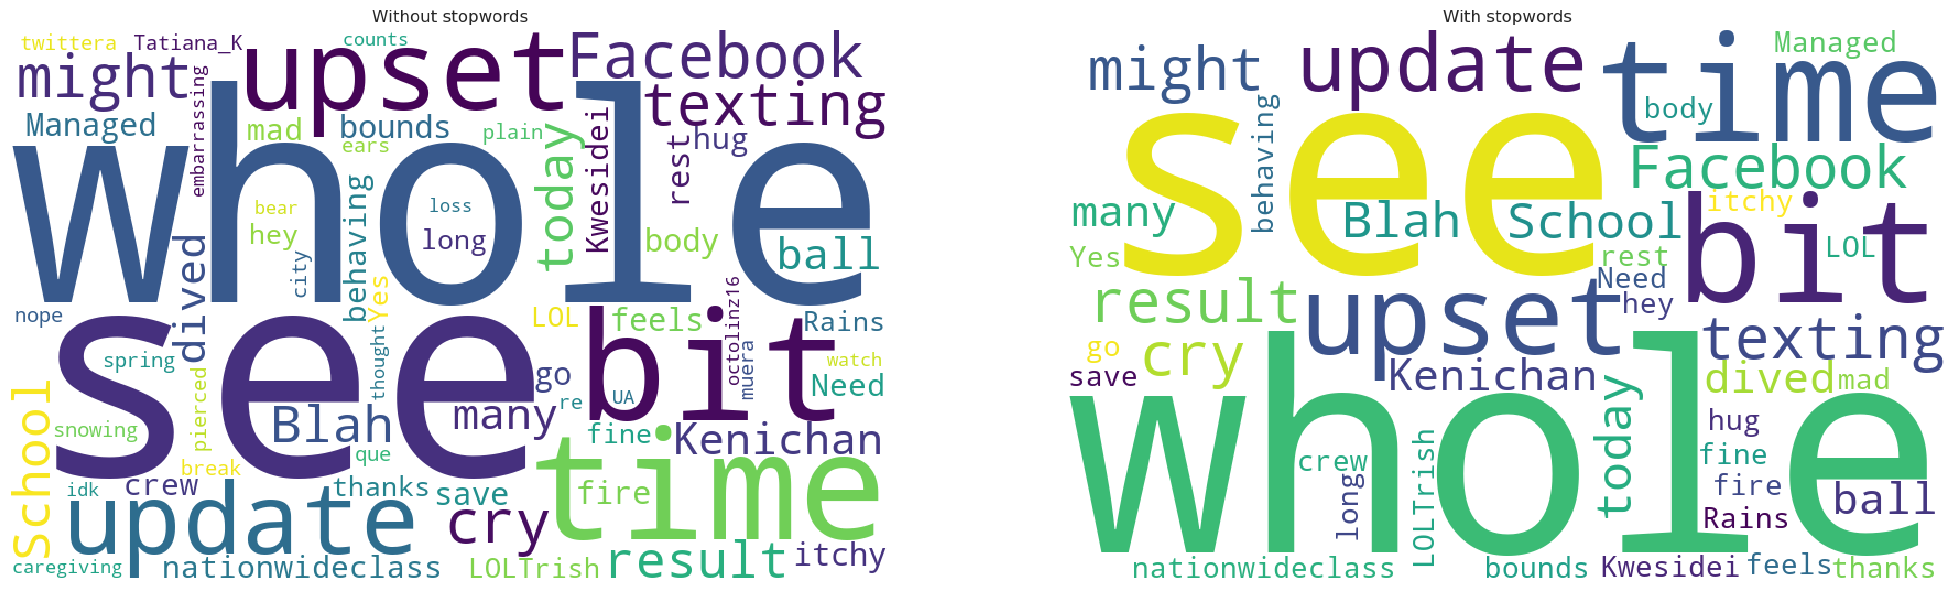

In [253]:
plotWordcloud(words_negative)

<Axes: xlabel='Hashtags'>

<Figure size 1500x600 with 0 Axes>

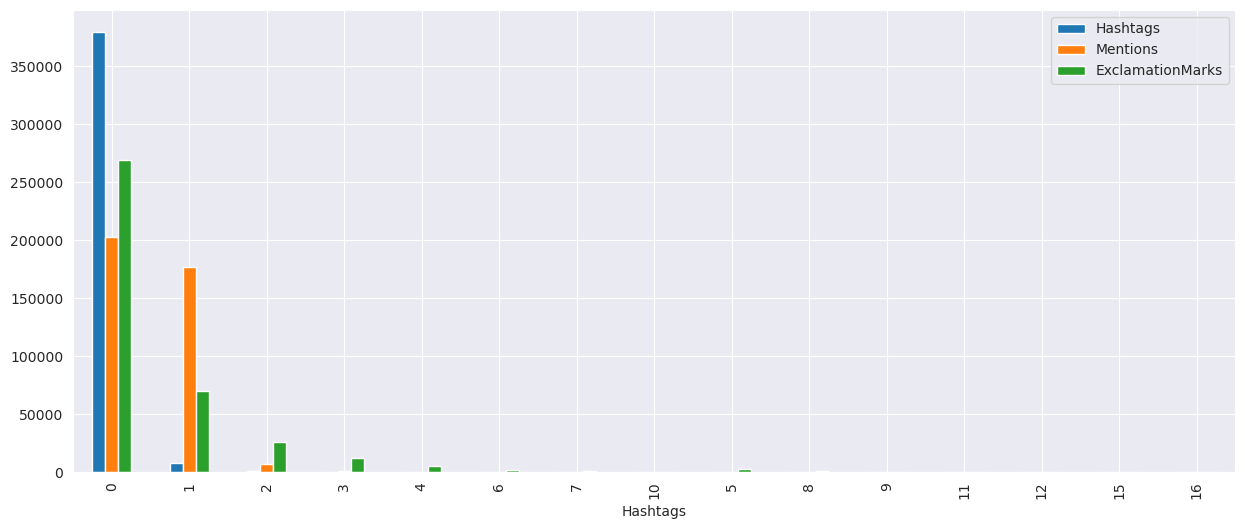

In [254]:
import re

def count_hashtags(text):
    return len([c for c in text if c == '#'])

def count_mentions(text):
    return len([c for c in text if c == '@'])

def count_exclamation_marks(text):
    return len([c for c in text if c == '!'])

df['Hashtags'] = df['Text'].apply(count_hashtags)
df['HasHashtags'] = df['Hashtags'] > 0
values_df = pd.DataFrame()
values_df['Hashtags'] = df['Hashtags'].value_counts()


df['Mentions'] = df['Text'].apply(count_mentions)
df['HasMentions'] = df['Mentions'] > 0
values_df['Mentions'] = df['Mentions'].value_counts()

df['ExclamationMarks'] = df['Text'].apply(count_exclamation_marks)
df['HasExclamationMarks'] = df['ExclamationMarks'] > 0
values_df['ExclamationMarks'] = df['ExclamationMarks'].value_counts()

plt.figure(figsize=(15, 6))
values_df.plot(kind='bar', figsize=(15, 6))

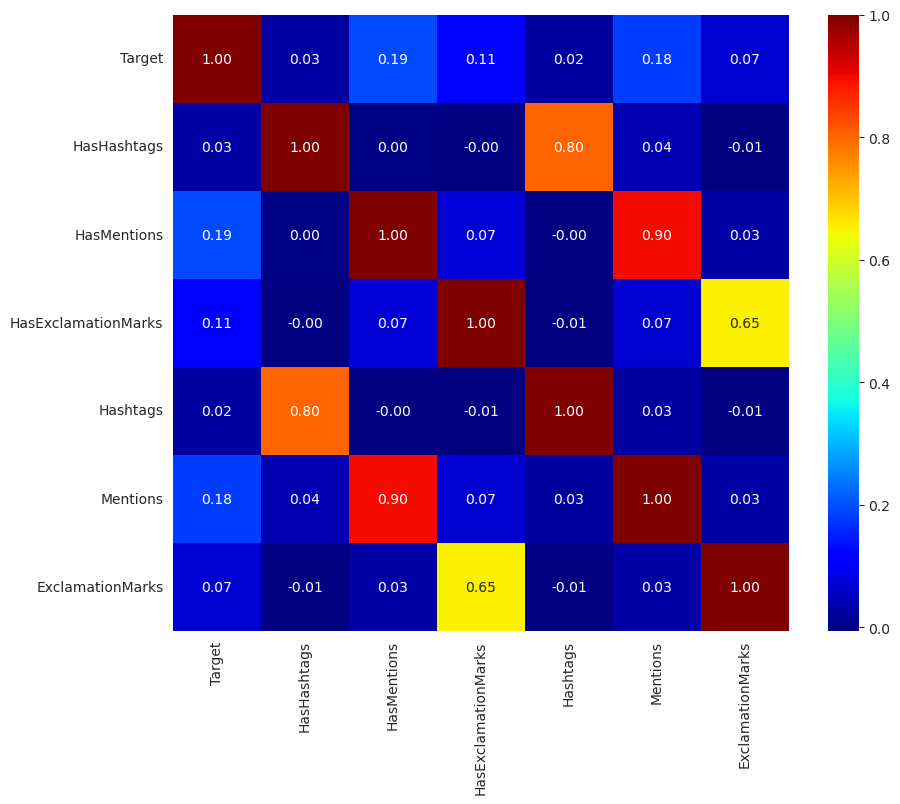

In [255]:
import seaborn as sns

corr = df[['Target', 'HasHashtags', 'HasMentions', 'HasExclamationMarks', 'Hashtags', 'Mentions', 'ExclamationMarks']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='jet', cbar=True, square=True)
plt.show()

To samo w sobie może nie mieć dużej wartości, ale w połączeniu z innymi cechami może być przydatne.

In [256]:
def detect_emoticons(text):
    emoticon_pattern = r'(:\)|:\(|;\)|:D|:P|:\||:\-\)|:\-\(|;\-\)|:‑D|:‑P|:‑\||<3)'
    return re.findall(emoticon_pattern, text)

In [257]:
df['Emoticons'] = df['Text'].apply(detect_emoticons)
emoticons = df[['Target', 'Emoticons']].explode('Emoticons').dropna().groupby(['Emoticons']).agg(['mean', 'count']).reset_index()

In [258]:
emoticons.head(10)

Emoticons    Target      
                 mean count
0        :)  1.000000     1
1        :D  1.000000     1
2        :|  0.397500   400
3        ;)  0.709980  2024
4       ;-)  0.688312   308

In [259]:
import textstat
df['FRE'] = df['Text'].apply(lambda x: textstat.flesch_reading_ease(x))
df['GFI'] = df['Text'].apply(lambda x: textstat.gunning_fog(x))

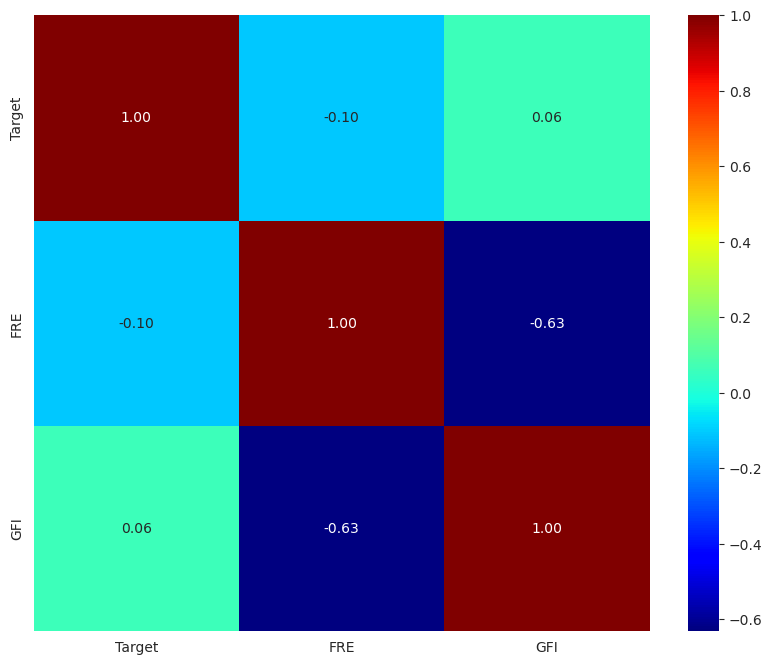

In [260]:
corr = df[['Target', 'FRE', 'GFI']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='jet', cbar=True, square=True)
plt.show()

In [275]:
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
df['Polarity_TB'] = df['Text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
sia = SentimentIntensityAnalyzer()
df['Compound_VADER'] = df['Text'].apply(lambda tweet: sia.polarity_scores(tweet)['compound'])


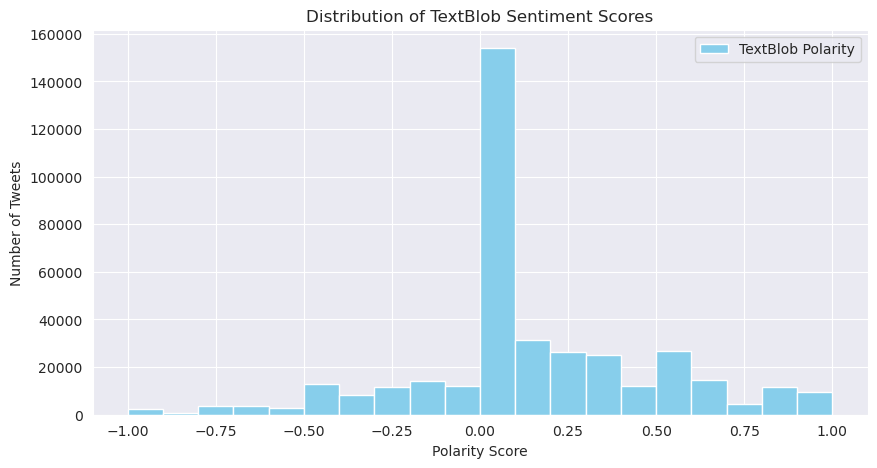

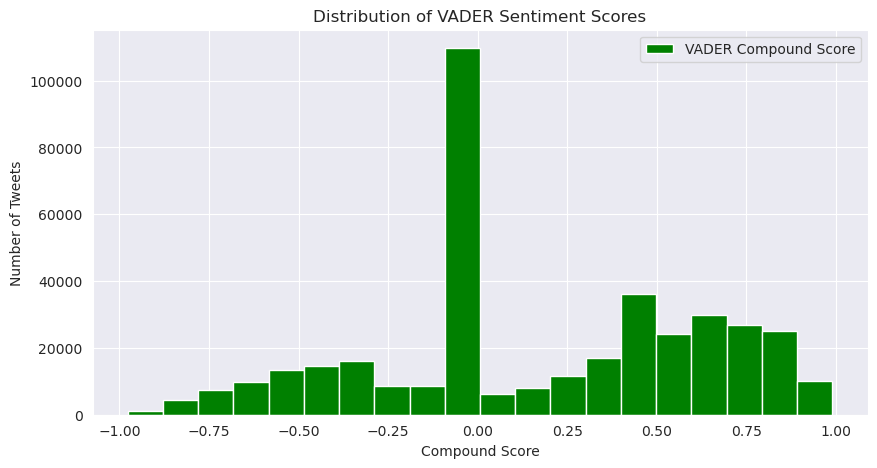

In [276]:
plt.figure(figsize=(10, 5))
plt.hist(df['Polarity_TB'], bins=20, color='skyblue', label='TextBlob Polarity')
plt.title('Distribution of TextBlob Sentiment Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Number of Tweets')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(df['Compound_VADER'], bins=20, color='green', label='VADER Compound Score')
plt.title('Distribution of VADER Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Number of Tweets')
plt.legend()
plt.show()

<Axes: >

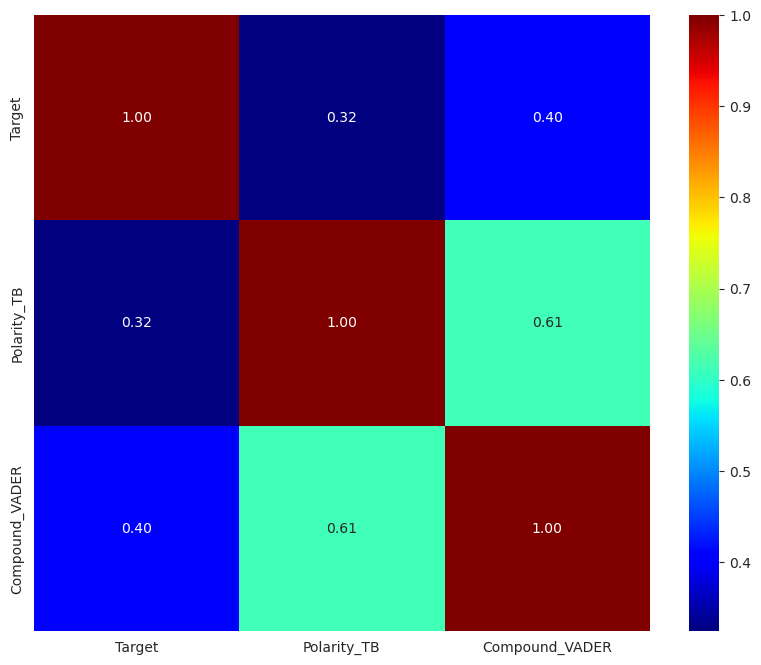

In [277]:
corr = df[['Target', 'Polarity_TB', 'Compound_VADER']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='jet', cbar=True, square=True)

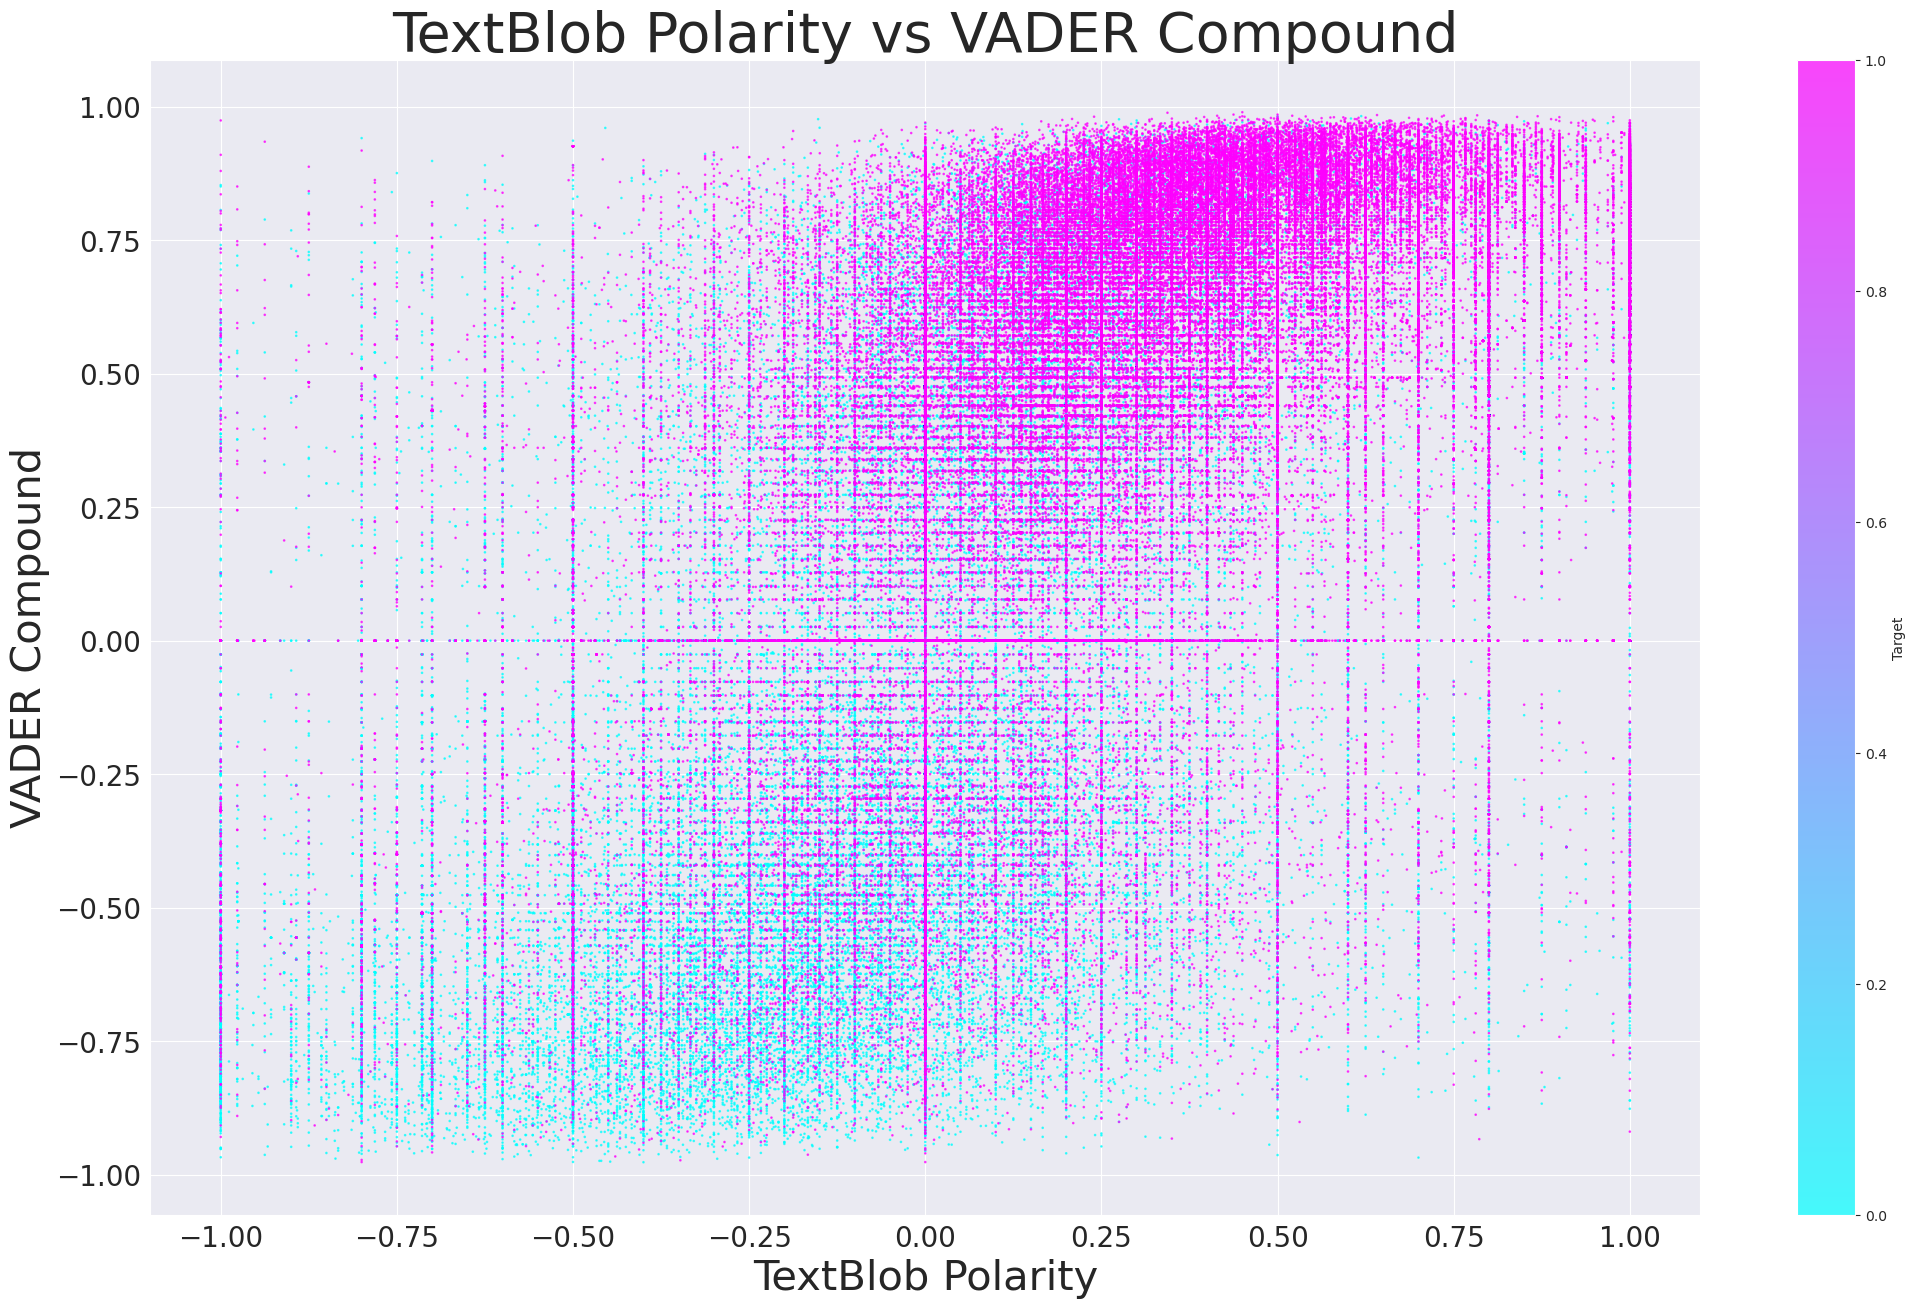

In [289]:
plt.figure(figsize=(25, 15))
plt.scatter(df['Polarity_TB'], df['Compound_VADER'], c=[df['Target']], cmap = 'cool', alpha=0.7, s = .8)
plt.colorbar(label='Target')
plt.title('TextBlob Polarity vs VADER Compound', fontsize=40)
plt.xlabel('TextBlob Polarity', fontsize=30)
plt.ylabel('VADER Compound', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## TODO: Explore all VADER and TextBlob scores